In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
query1 = pd.read_excel("latencies/q1-t1-c1.xlsx")
query2 = pd.read_excel("latencies/q2-t1-c1.xlsx")
query3 = pd.read_excel("latencies/q3-t1-c1.xlsx")

query1['rows'] = query1['rows'].astype(str)
query2['rows'] = query2['rows'].astype(str)
query3['rows'] = query3['rows'].astype(str)

cc_query1 = pd.read_excel("latencies/q1-t5-c5.xlsx")
cc_query2 = pd.read_excel("latencies/q2-t5-c5.xlsx")
cc_query3 = pd.read_excel("latencies/q3-t5-c5.xlsx")


cc_query1['rows'] = cc_query1['rows'].astype(str)
cc_query2['rows'] = cc_query2['rows'].astype(str)
cc_query3['rows'] = cc_query3['rows'].astype(str)

bottlenecks = pd.read_excel("latencies/bottlenecks.xlsx")
bottlenecks = bottlenecks.melt(id_vars='language', var_name='Constituent', value_name='runtime')


In [12]:
def plots(query, title):

    with plt.style.context("seaborn-v0_8-pastel"):
        fig, axes = plt.subplots(1, 2)
        fig.set_figheight(5)
        fig.set_figwidth(12)
        fig.set_facecolor('#94a3b8')
        fig.suptitle(title, fontsize = 20)
        axes[0].set_facecolor('#e2e8f0')
        axes[1].set_facecolor('#e2e8f0')
        axes[0].set_title("Average Latency")
        axes[1].set_title("Completed Requests (in 30s)")
        sns.lineplot(
            data = query,
            x = query['rows'],
            y = query['avg latency (ms)'],
            hue = query['language'],
            palette = ['#0ea5e9', '#eab308'],
            marker = 'o',
            ax = axes[0]
        )
        sns.lineplot(
            data = query,
            x = query['rows'],
            y = query['requests'],
            hue = query['language'],
            palette = ['#0ea5e9', '#eab308'],
            marker = 'o',
            ax = axes[1]
        )
        axes[0].set_xticks(query['rows'], query['rows'], rotation=45)
        axes[1].set_xticks(query['rows'], query['rows'], rotation=45)
        plt.show()

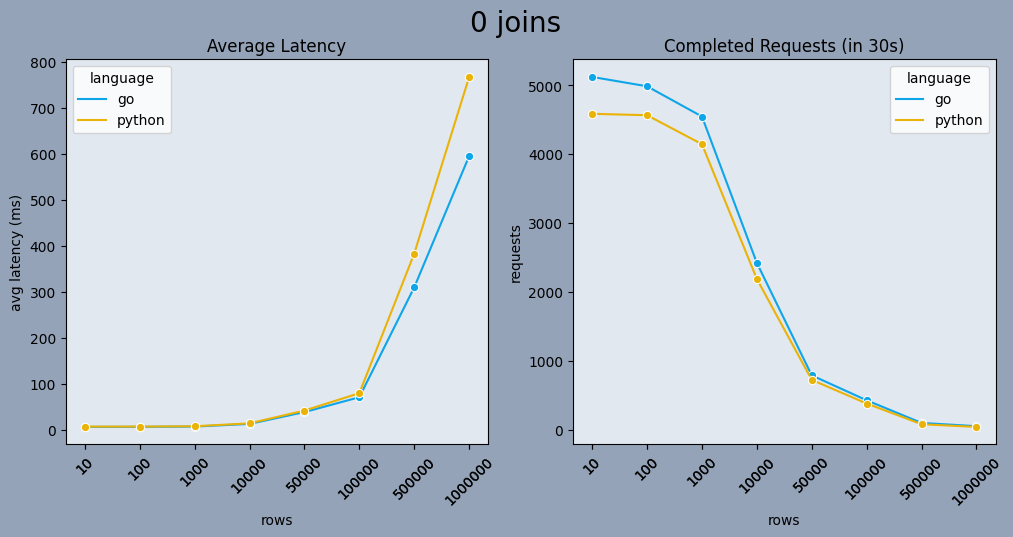

In [13]:
plots(query1, "0 joins")

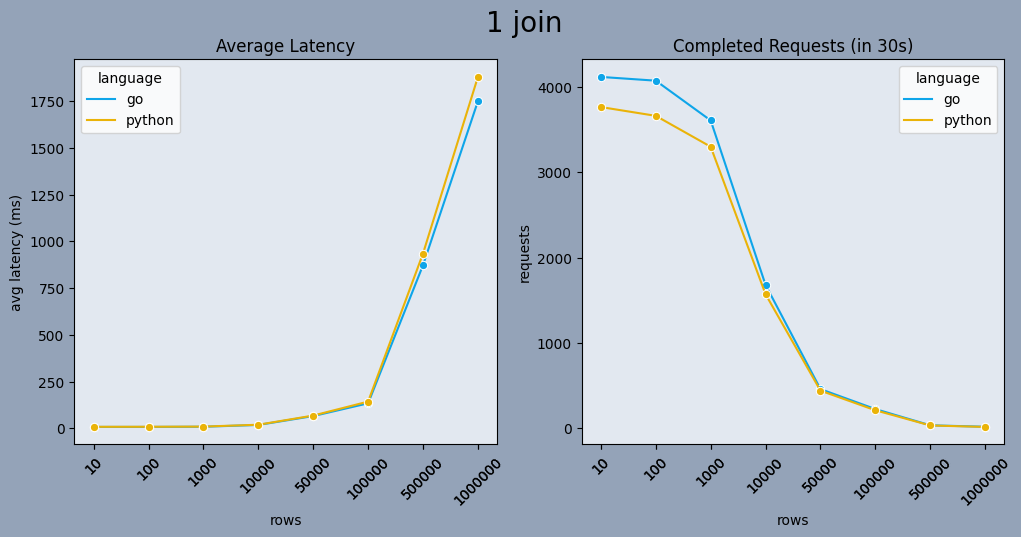

In [14]:
plots(query2, "1 join")

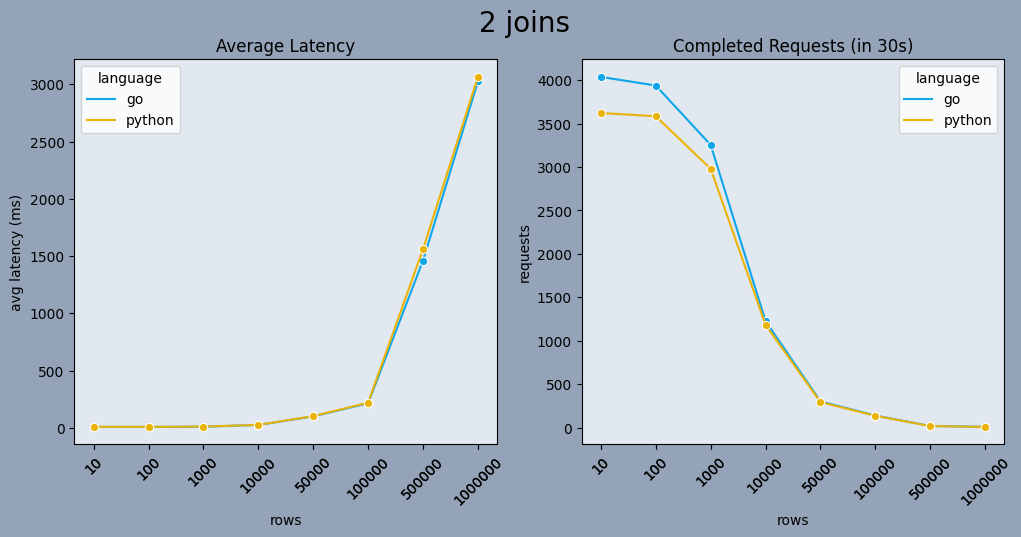

In [15]:
plots(query3, "2 joins")

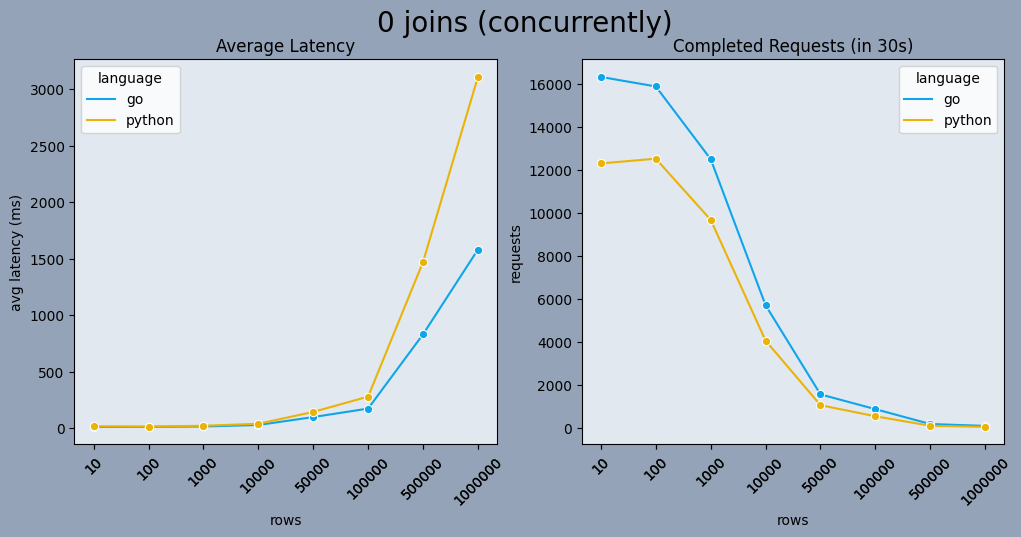

In [16]:
plots(cc_query1, "0 joins (concurrently)")

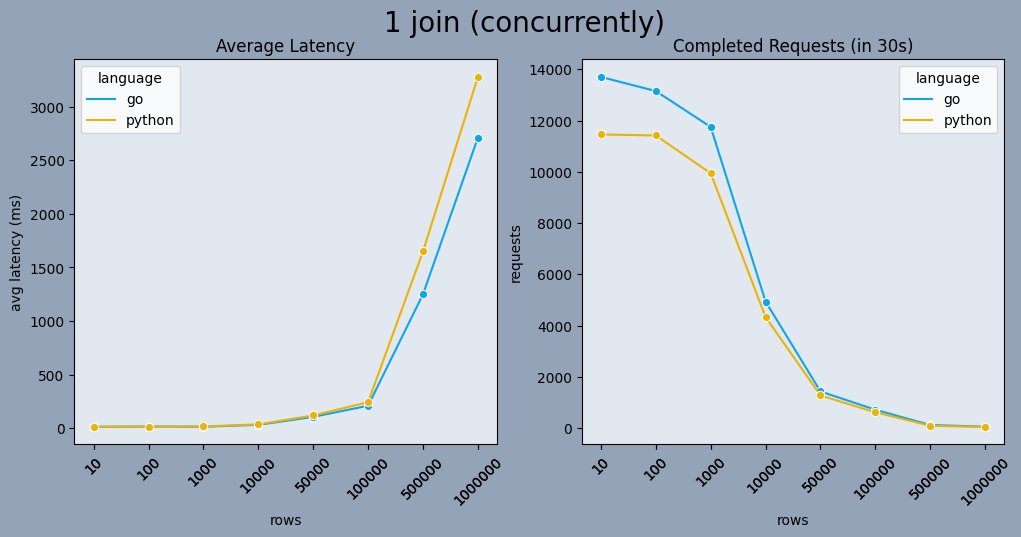

In [17]:
plots(cc_query2, "1 join (concurrently)")


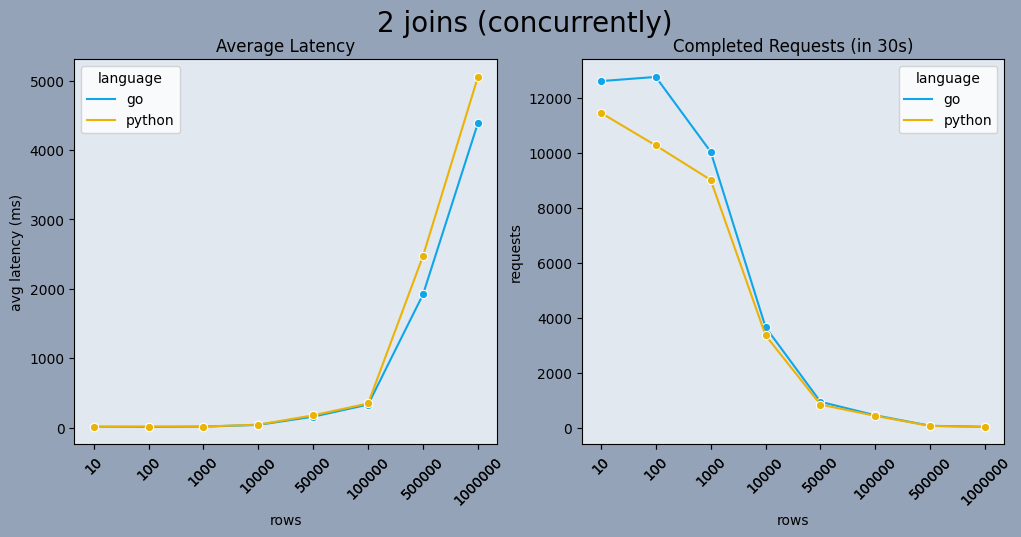

In [18]:
plots(cc_query3, "2 joins (concurrently)")

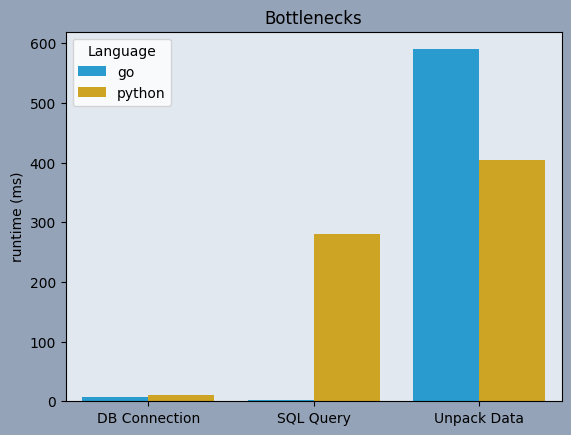

In [19]:
with plt.style.context("seaborn-v0_8-pastel"):
    fig, axes = plt.subplots(1, 1)
    fig.set_facecolor('#94a3b8')
    axes.set_facecolor('#e2e8f0')
    axes.set_title("Average Latency")
    sns.barplot(
        data=bottlenecks, 
        x='Constituent', 
        y='runtime', 
        hue = 'language', 
        palette=['#0ea5e9', '#eab308'],
        ax=axes
    )
    plt.xlabel(None)
    plt.ylabel('runtime (ms)')
    plt.title('Bottlenecks')
    plt.legend(title='Language')
    plt.show()